# 0. Introduction

Example based on: Deep Learning with Python by Francois Chollet:
https://www.manning.com/books/deep-learning-with-python

If you need help using the Keras framework: check out the docs at: https://keras.io/

In [0]:
!pip install tensorflow

In [0]:
!pip install keras

In [0]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load data

The MNIST database of handwritten digit has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


# 2. Inspect data

Try to get a feel for the data you are using to train and test your neural network. 

## Training data

- Training data will be used to train our neural network to recognize hand-written digits.
- MNIST provides 60000 labeled training images, each 28x28 pixels

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels.shape

(60000,)

In [0]:
def show_image(images, labels, index):
    img = images[index].reshape((28,28))
    label = labels[index]
    plt.imshow(img)
    plt.title(label)
    plt.show()

# Exercise 1

Display different samples from the training set below. 

(You can show one index, or loop over a couple of values)

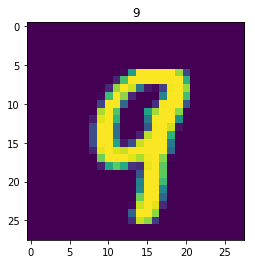

In [0]:
show_image(train_images, train_labels, 800)

## Test data

- Test data will be used to validate how good our network performs on data it has never seen.
- MNIST provides 10000 test images, each 28x28.
- It's important to note that these should never be used in the training cycle. A 'test set' should never contain images the network has already seen during training. (read more: [Model Selection and Train/Validation/Test Sets](https://www.coursera.org/lecture/machine-learning/model-selection-and-train-validation-test-sets-QGKbr) and [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/))

# Exercise 2

Print the test images and test labels shape below: 

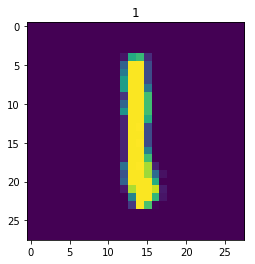

In [0]:
show_image(test_images, test_labels, 168)

# 3. Network architecture

Define the network architecture that will be used for training

- how many layers 
- which type of layer (we'll see more types later)
- how many nodes in each layer
- activation function in each layer


# Exercise 3 

a. Change the 'relu' activation function to 'sigmoid'. What happens? (run the cells below to see a difference in test results)

b. Figure out how to add "0.6 Dropout" to the first layer of the network.

c. What happens if you add more a BatchNorm layer, or more Dense layers?

d. What happens if you add L1 or L2 regularization to the activations?


In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# The final layer has 10 nodes, each node represents one class of numbers
network.add(layers.Dense(10, activation='softmax'))

In [0]:
newnetwork = models.Sequential()
newnetwork.add(Dropout(0.6))
newnetwork.add(layers.Dense(512, kernel_regularizer=l2(0.01), activation='sigmoid', input_shape=(28 * 28,)))
newnetwork.add(BatchNormalization())

# The final layer has 10 nodes, each node represents one class of numbers
newnetwork.add(layers.Dense(10, activation='softmax'))

# 4. Compilation Step

In the compilation step we define the:

- the loss function
- the optimizer
- the evaluation metric

# Exercise 4

Change the optimizer from "RMSProp" to "Adam" with good default values:

- learning rate of 0.01
- beta_1 of 0.9
- beta_2 of 0.999
- no epsilon
- learning rate decay (annealing)

Does this improve the accuracy of the test set?

What happens if you change the optimizer to good old SGD? Or to Nadam? 

In [0]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
newnetwork.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

newnetwork.build()

# 5. Data Preparation

Before feeding the data into the network for training, we make sure it is formatted properly.

## Prepare the images

### Reshape the images to vectors of integers

In [0]:
train_images_reshaped = train_images.reshape((60000, 28*28))
test_images_reshaped = test_images.reshape((10000, 28*28))

In [0]:
train_images_reshaped.shape

(60000, 784)

### Resize the values to a value between 0 and 1

In [0]:
train_images_transformed = train_images_reshaped.astype('float32') / 255
test_images_transformed = test_images_reshaped.astype('float32') / 255

## Prepare the labels

In [0]:
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [0]:
train_labels_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 6. Network summary

In [0]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
newnetwork.build()
newnetwork.summary()

ValueError: ignored

# 7. Train the network

Feed the training images and labels to the network.

Two additional parameters need to be supplied:

- epochs: how many times the network will look at the entire dataset. 
- batch_size: how many images will be put through the network at one time.

# Exercise 5

- Can you train the network longer?
- What happens to the training accuracy?
- And the test accuracy?

In [0]:
history = network.fit(train_images_transformed, train_labels_categorical, validation_split=0.33, epochs=10, batch_size=128)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 2s 45us/step - loss: 0.0069 - acc: 0.9982 - val_loss: 0.0171 - val_acc: 0.9952
Epoch 2/10
40199/40199 [==============================] - 2s 46us/step - loss: 0.0051 - acc: 0.9988 - val_loss: 0.0124 - val_acc: 0.9965
Epoch 3/10
40199/40199 [==============================] - 2s 45us/step - loss: 0.0033 - acc: 0.9993 - val_loss: 0.0134 - val_acc: 0.9957
Epoch 4/10
40199/40199 [==============================] - 2s 46us/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0139 - val_acc: 0.9956
Epoch 5/10
40199/40199 [==============================] - 2s 44us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0172 - val_acc: 0.9943
Epoch 6/10
40199/40199 [==============================] - 2s 46us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0186 - val_acc: 0.9947
Epoch 7/10
40199/40199 [==============================] - 2s 45us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0200 - val_acc

In [0]:
history = newnetwork.fit(train_images_transformed, train_labels_categorical, validation_split=0.33, epochs=10, batch_size=128)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 2s 45us/step - loss: 0.8422 - acc: 0.8422 - val_loss: 0.6187 - val_acc: 0.9015
Epoch 2/10
40199/40199 [==============================] - 2s 46us/step - loss: 0.8753 - acc: 0.8387 - val_loss: 0.6878 - val_acc: 0.8989
Epoch 3/10
40199/40199 [==============================] - 2s 45us/step - loss: 0.8925 - acc: 0.8403 - val_loss: 0.6775 - val_acc: 0.9159
Epoch 4/10
40199/40199 [==============================] - 2s 46us/step - loss: 0.8803 - acc: 0.8371 - val_loss: 0.6283 - val_acc: 0.9108
Epoch 5/10
40199/40199 [==============================] - 2s 44us/step - loss: 0.9286 - acc: 0.8377 - val_loss: 0.6944 - val_acc: 0.9027
Epoch 6/10
40199/40199 [==============================] - 2s 47us/step - loss: 0.8656 - acc: 0.8416 - val_loss: 0.6249 - val_acc: 0.9185
Epoch 7/10
40199/40199 [==============================] - 2s 45us/step - loss: 0.8624 - acc: 0.8412 - val_loss: 0.6917 - val_acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


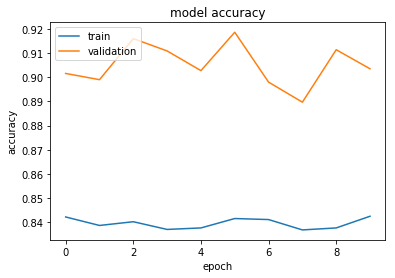

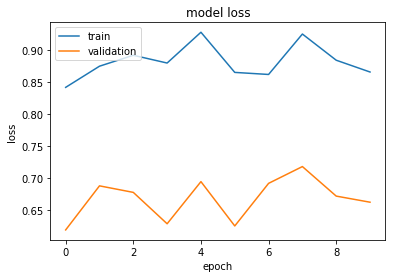

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 8. Test the network

Use the test set (which the network has not seen yet) to test how well the network will perform on images it has not seen yet:

In [0]:
test_loss, test_acc = network.evaluate(test_images_transformed, test_labels_categorical)

10000/10000 [==============================] - 1s 54us/step


In [0]:
test_loss, test_acc = newnetwork.evaluate(test_images_transformed, test_labels_categorical)

10000/10000 [==============================] - 0s 45us/step


In [0]:
print('test_acc; ', test_acc)

test_acc;  0.9827


In [0]:
print('test_acc; ', test_acc)

test_acc;  0.9085
